Confusion Matrix:
[[105 131]
 [ 86 338]]

Classification Report:
              precision    recall  f1-score   support

           0      0.550     0.445     0.492       236
           1      0.721     0.797     0.757       424

    accuracy                          0.671       660
   macro avg      0.635     0.621     0.624       660
weighted avg      0.660     0.671     0.662       660

ROC AUC: 0.703


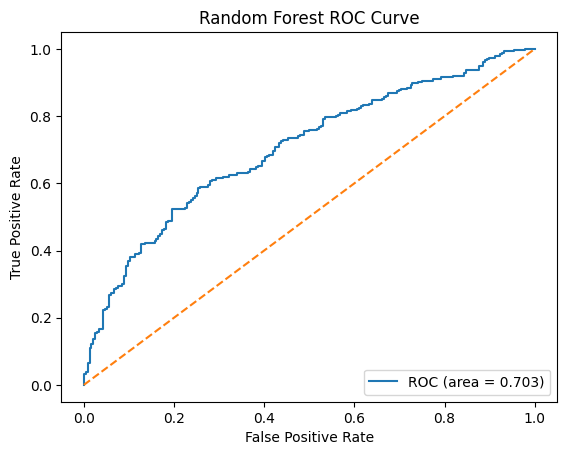

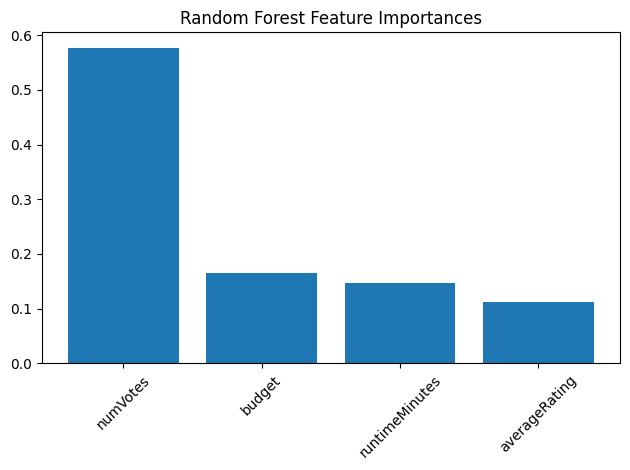

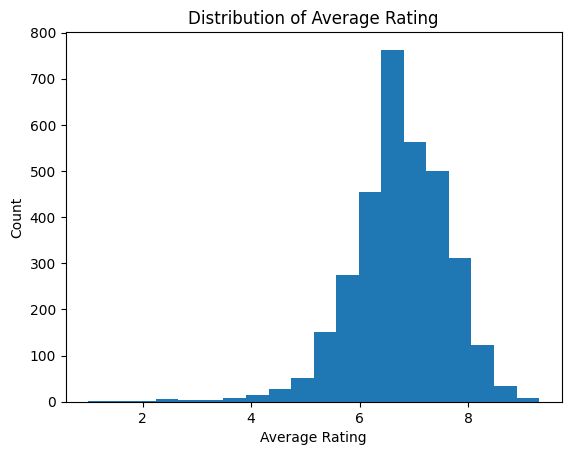

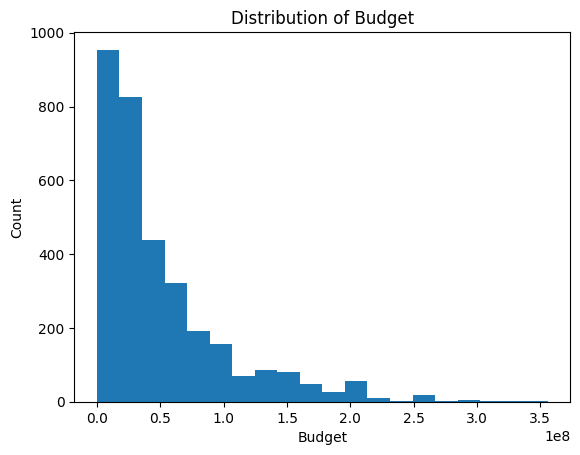

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

df = pd.read_csv("s3://cap4770-2025spring2/Filtered IMDb Movies TV Shows.csv")

df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

df.dropna(subset=['budget', 'gross'], inplace=True)

df['HitFlop'] = np.where(df['gross'] >= 2 * df['budget'], 1, 0)

features = ['budget', 'runtimeMinutes', 'averageRating', 'numVotes']
X = df[features]
y = df['HitFlop']
X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)
print(f"ROC AUC: {roc_auc:.3f}")

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (area = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df['averageRating'].dropna(), bins=20)
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.title("Distribution of Average Rating")
plt.show()

plt.figure()
plt.hist(df['budget'].dropna(), bins=20)
plt.xlabel("Budget")
plt.ylabel("Count")
plt.title("Distribution of Budget")
plt.show()